<a href="https://colab.research.google.com/github/cristinarainich/MLTSA22_KRainich/blob/main/train/07_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from sklearn.datasets import fetch_openml
from numpy import random
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import pylab as pl

In [5]:
co2 = fetch_openml(data_id=41187, as_frame = True)
co2.frame

,year,month,day,weight,flag,station,co2
0,1958.0,3.0,29.0,4.0,0.0,MLO,316.1
1,1958.0,4.0,5.0,6.0,0.0,MLO,317.3
2,1958.0,4.0,12.0,4.0,0.0,MLO,317.6
3,1958.0,4.0,19.0,6.0,0.0,MLO,317.5
4,1958.0,4.0,26.0,2.0,0.0,MLO,316.4
...,...,...,...,...,...,...,...
2220,2001.0,12.0,1.0,7.0,0.0,MLO,370.3
2221,2001.0,12.0,8.0,7.0,0.0,MLO,370.8
2222,2001.0,12.0,15.0,7.0,0.0,MLO,371.2
2223,2001.0,12.0,22.0,6.0,0.0,MLO,371.3


In [7]:
co2 = pd.DataFrame(co2.frame)

In [8]:
co2.describe()

,year,month,day,weight,flag,co2
count,2225.000000,2225.000000,2225.000000,2225.000000,2225.0,2225.000000
mean,1980.026067,6.568989,15.725393,5.816180,0.0,340.142247
std,12.495512,3.451596,8.796644,1.381698,0.0,17.003885
min,1958.000000,1.000000,1.000000,1.000000,0.0,313.000000
25%,1969.000000,4.000000,8.000000,5.000000,0.0,324.800000
50%,1980.000000,7.000000,16.000000,6.000000,0.0,338.300000
75%,1991.000000,10.000000,23.000000,7.000000,0.0,354.800000
max,2001.000000,12.000000,31.000000,7.000000,0.0,373.900000


In [9]:
co2.head()

,year,month,day,weight,flag,station,co2
0,1958.0,3.0,29.0,4.0,0.0,MLO,316.1
1,1958.0,4.0,5.0,6.0,0.0,MLO,317.3
2,1958.0,4.0,12.0,4.0,0.0,MLO,317.6
3,1958.0,4.0,19.0,6.0,0.0,MLO,317.5
4,1958.0,4.0,26.0,2.0,0.0,MLO,316.4


In [11]:
random.seed(123)

In [16]:
co2['co2nan'] = co2['co2'].copy()
co2['co2nan'][random.randint(0, 2225, 100)] = np.nan 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
co2.describe()

,year,month,day,weight,flag,co2,co2nan
count,2225.000000,2225.000000,2225.000000,2225.000000,2225.0,2225.000000,2127.000000
mean,1980.026067,6.568989,15.725393,5.816180,0.0,340.142247,340.261683
std,12.495512,3.451596,8.796644,1.381698,0.0,17.003885,17.017650
min,1958.000000,1.000000,1.000000,1.000000,0.0,313.000000,313.000000
25%,1969.000000,4.000000,8.000000,5.000000,0.0,324.800000,325.000000
50%,1980.000000,7.000000,16.000000,6.000000,0.0,338.300000,338.400000
75%,1991.000000,10.000000,23.000000,7.000000,0.0,354.800000,354.950000
max,2001.000000,12.000000,31.000000,7.000000,0.0,373.900000,373.900000


In [18]:
co2.isna().sum(axis=0)

year        0
month       0
day         0
weight      0
flag        0
station     0
co2         0
co2nan     98
dtype: int64

In [22]:
imputer = KNNImputer(n_neighbors=3)
imputer.fit_transform(co2[['year', 'month', 'day', 'weight', 'flag', 'station', 'co2nan']].values)

ValueError: ignored

In [26]:
co2['station'] = pd.Categorical(co2.station).codes

In [34]:
co2['date'] = pd.to_datetime(['%d %d %d'%(co2.iloc[i].year,
                                          co2.iloc[i].month,
                                          co2.iloc[i].day) for i in co2.index])

In [35]:
co2['date'] = (co2.date - co2.iloc[0].date).dt.days

In [36]:
co2['co2filled'] = imputer.fit_transform(co2[['weight', 'date', 'co2nan']])[:,-1]

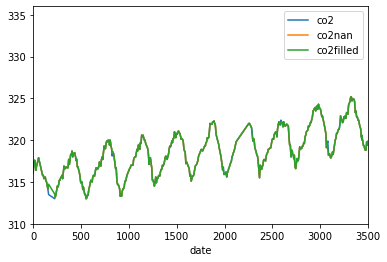

In [42]:
ax = co2.plot(x='date', y='co2')
co2.plot(x='date',y='co2nan', ax=ax)
co2.plot(x='date',y='co2filled', ax=ax)
pl.xlim(0,3500)
pl.ylim(310, 336);

In [43]:
((co2.co2 - co2.co2filled)**2).sum()/len(co2)

0.008123345817727869